In [ ]:
import warnings,logging
warnings.simplefilter('ignore')
logging.disable(logging.WARNING)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
#first set ta dataset path
df = pd.read_csv('/content/drive/MyDrive/train_clean.csv')

In [31]:
#just printing the dataset for checking
df

,Unnamed: 0,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,26545,baconatorX,a baby about to get shat on,1452739349,imgur.com,True,40vljy,https://external-preview.redd.it/VpsxLZIualmxd...,NaN,100,1902,misleadingthumbnails,A baby about to get shat on,0.86,0,2,2
1,8591,MrNachoMacho,a baby and a cat,1407559715,i.imgur.com,True,2d1p50,https://external-preview.redd.it/Z8yEfSG9qHb1T...,NaN,2,2,photoshopbattles,PsBattle: A baby and a cat,0.67,1,0,0
2,8298,UnicornWolfy,a baby and a older sister cuddling,1400110605,mcpactions.com,True,25kyaf,https://external-preview.redd.it/M6aDBTW6OdJ6Y...,NaN,2,2,photoshopbattles,A baby and a older sister cuddling,0.67,1,0,0
3,12879,sistom,a baby being tossed in the air,1439211389,i.imgur.com,True,3ggk55,https://external-preview.redd.it/tU7auZNQeQNwB...,NaN,7,8,photoshopbattles,PsBattle: A baby being tossed in the air,0.76,1,0,0
4,49164,its_a_tarp_,a baby dikdik named thanos,1505814583,i.redd.it,True,711wlf,https://preview.redd.it/ndtbwincatmz.jpg?width...,NaN,9,61,photoshopbattles,PsBattle: A baby dik-dik named Thanos.,0.86,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23321,17035,rocklou,this husky looking at the camera,1495209838,i.redd.it,True,6c4k6s,https://preview.redd.it/mhc249s5chyy.jpg?width...,NaN,2,16,photoshopbattles,PsBattle: This husky looking at the camera,0.90,1,0,0
23322,6132,bilbo-e,this hut someone built at the beach,1567958247,i.redd.it,True,d1cpnb,https://preview.redd.it/p4ha8mac7el31.jpg?widt...,NaN,2,23,mildlyinteresting,This hut someone built at the beach,0.86,1,0,0
23323,32637,Cinder1977,this hydrangea has a random white flower cluster,1568002956,i.redd.it,True,d1lzlw,https://preview.redd.it/wp56r7h8whl31.jpg?widt...,NaN,0,6,mildlyinteresting,This hydrangea has a random white flower cluster,0.76,1,0,0
23324,47860,smilesmofkdavis,this hyperfocused caterer,1507296245,i.redd.it,True,74nkvp,https://preview.redd.it/fev7oih2o7qz.jpg?width...,NaN,1,8,photoshopbattles,PsBattle: This hyper-focused caterer,0.84,1,0,0


In [6]:
#install tranformer
! pip install transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.1 MB/s eta 0:00:00


In [7]:
from transformers import pipeline

# Image Captioning

In [14]:
#load image caption pipeline
caption = pipeline('image-to-text')

No model was supplied, defaulted to ydshieh/vit-gpt2-coco-en and revision 65636df (https://huggingface.co/ydshieh/vit-gpt2-coco-en).
Using a pipeline without specifying a model name and revision in production is not recommended.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.9/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [33]:
#here index number is row number from dataset
index=10
image_url=df['image_url'][index]

In [35]:
cleancap=df['clean_title'][index]

In [36]:
#printing the clean caption
cleancap

'a baby laying on its back stretching'

In [37]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
# this is for downloading the dataset
import wget
filename = wget.download(image_url)

In [38]:
#pass the image to image caption pipeline for image captioning
caption=caption(filename)

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [39]:
#printing the caption
caption

[{'generated_text': 'a baby in a crib with a white blanket '}]

In [43]:

caption=caption[0]

In [44]:
def listToString(s):
 
    # initialize an empty string
    str1 = ""
 
    # traverse in the string
    for ele in s:
        str1 += ele
 
    # return string
    return str1

In [45]:
listToString(caption)

'generated_text'

In [48]:
caption=caption["generated_text"]

In [49]:
caption

'a baby in a crib with a white blanket '

In [50]:
cleancap

'a baby laying on its back stretching'

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



# Create vector representations of the texts using TF-IDF
tfidf = TfidfVectorizer().fit_transform([caption, cleancap])

# Compute the cosine similarity between the vectors
cosine_sim = cosine_similarity(tfidf[0], tfidf[1])

print(cosine_sim[0][0])

0.09193998174078082


In [57]:
if cosine_sim[0][0]>0 :
  print("real")
else:
  print("fake")

real


# OCR

In [ ]:
ocr = pipeline('image-to-text', model = "microsoft/trocr-base-handwritten")

Downloading:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

In [ ]:
!wget -O handwriting.jpg 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSoolxi9yWGAT5SLZShv8vVd0bz47UWRzQC19fDTeE8GmGv_Rn-PCF1pP1rrUx8kOjA4gg&usqp=CAU'

--2022-09-28 20:17:38--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSoolxi9yWGAT5SLZShv8vVd0bz47UWRzQC19fDTeE8GmGv_Rn-PCF1pP1rrUx8kOjA4gg&usqp=CAU
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.20.113, 74.125.20.100, 74.125.20.138, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.20.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4324 (4.2K) [image/jpeg]
Saving to: ‘handwriting.jpg’

handwriting.jpg     100%[===================>]   4.22K  --.-KB/s    in 0s      

2022-09-28 20:17:38 (32.5 MB/s) - ‘handwriting.jpg’ saved [4324/4324]



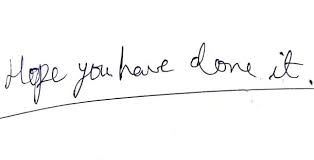

In [ ]:
from IPython.display import Image
Image(filename='handwriting.jpg') 

In [ ]:
ocr('handwriting.jpg')

[{'generated_text': 'Hope you have done it.'}]